In [1]:
import pingouin as pg
import psython as psy

ModuleNotFoundError: No module named 'pingouin'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2016 to 2017 delta, themes and sections, geolocation

In [7]:
df_2016_themes = pd.read_csv('data/acute/2016_acute_themes.csv')
df_2016_themes = df_2016_themes.fillna(df_2016_themes.mean().astype(int))

df_2017_themes = pd.read_csv('data/acute/2017_acute_themes.csv')
df_2017_themes=df_2017_themes.fillna(df_2017_themes.mean().astype(int))

<ipython-input-7-6d3734fd40e4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2016_themes = df_2016_themes.fillna(df_2016_themes.mean().astype(int))
<ipython-input-7-6d3734fd40e4>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2017_themes=df_2017_themes.fillna(df_2017_themes.mean().astype(int))


In [8]:
df_2016_themes = df_2016_themes.add_suffix('_2016')
df_2017_themes = df_2017_themes.add_suffix('_2017')

In [9]:
df_combined = pd.concat([df_2016_themes.set_index('organisation_id_2016'),
           df_2017_themes.set_index('organisation_id_2017')], axis=1, join='inner').reset_index()

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   151 non-null    object 
 1   organisation_name_2016                  151 non-null    object 
 2   readiness_2016                          151 non-null    int64  
 3   capabilities_2016                       151 non-null    int64  
 4   enabling_infrastructure_2016            151 non-null    int64  
 5   strategic_alignment_2016                151 non-null    int64  
 6   leadership_2016                         151 non-null    int64  
 7   resourcing_2016                         151 non-null    int64  
 8   governance_2016                         151 non-null    float64
 9   information_governance_2016             151 non-null    float64
 10  asset_resource_optimisation_2016        151 non-null    int64 

In [11]:
#df_combined.isna().sum()

In [12]:
##calculating deltas
df_combined['readiness_delta'] = df_combined['readiness_2017'] - df_combined['readiness_2016']
df_combined['capabilities_delta'] = df_combined['capabilities_2017'] - df_combined['capabilities_2016']
df_combined['enabling_infrastructure_delta'] = df_combined['enabling_infrastructure_2017'] - df_combined['enabling_infrastructure_2016']
df_combined['strategic_alignment_delta'] = df_combined['strategic_alignment_2017'] - df_combined['strategic_alignment_2016']
df_combined['leadership_delta'] = df_combined['leadership_2017'] - df_combined['leadership_2016']
df_combined['resourcing_delta'] = df_combined['resourcing_2017'] - df_combined['resourcing_2016']
df_combined['governance_delta'] = df_combined['governance_2017'] - df_combined['governance_2016']
df_combined['information_governance_delta'] = df_combined['information_governance_2017'] - df_combined['information_governance_2016']
df_combined['asset_resource_optimisation_delta'] = df_combined['asset_resource_optimisation_2017'] - df_combined['asset_resource_optimisation_2016']
df_combined['decision_support_delta'] = df_combined['decision_support_2017'] - df_combined['decision_support_2016']
df_combined['medicines_management_optimisation_delta'] = df_combined['medicines_management_optimisation_2017'] - df_combined['medicines_management_optimisation_2016']
df_combined['orders_results_management_delta'] = df_combined['orders_results_management_2017'] - df_combined['orders_results_management_2016']
df_combined['records_assessments_plans_delta'] = df_combined['records_assessments_plans_2017'] - df_combined['records_assessments_plans_2016']
df_combined['remote_assistive_care_delta'] = df_combined['remote_assistive_care_2017'] - df_combined['remote_assistive_care_2016']
df_combined['standards_delta'] = df_combined['standards_2017'] - df_combined['standards_2016']
df_combined['transfers_of_care_delta'] = df_combined['transfers_of_care_2017'] - df_combined['transfers_of_care_2016']

In [13]:
## joining geo-coordinates 
geolocated = pd.read_csv('data/geolocated.csv')
geo_df = geolocated[['index', 'location', 'point']].copy()
joined = df_combined.merge(geo_df, on= 'index', how='left')

In [14]:
joined

,index,organisation_name_2016,readiness_2016,capabilities_2016,enabling_infrastructure_2016,strategic_alignment_2016,leadership_2016,resourcing_2016,governance_2016,information_governance_2016,asset_resource_optimisation_2016,decision_support_2016,medicines_management_optimisation_2016,orders_results_management_2016,records_assessments_plans_2016,remote_assistive_care_2016,standards_2016,transfers_of_care_2016,organisation_name_2017,strategic_alignment_2017,leadership_2017,resourcing_2017,governance_2017,information_governance_2017,records_assessments_plans_2017,orders_results_management_2017,transfers_of_care_2017,medicines_management_optimisation_2017,decision_support_2017,remote_assistive_care_2017,asset_resource_optimisation_2017,business_clinical_intelligence_2017,standards_2017,enabling_infrastructure_2017,readiness_2017,capabilities_2017,readiness_delta,capabilities_delta,enabling_infrastructure_delta,strategic_alignment_delta,leadership_delta,resourcing_delta,governance_delta,information_governance_delta,asset_resource_optimisation_delta,decision_support_delta,medicines_management_optimisation_delta,orders_results_management_delta,records_assessments_plans_delta,remote_assistive_care_delta,standards_delta,transfers_of_care_delta,location,point
0,REM,Aintree University Hospital NHS Foundation Trust,86,59,98,90,100,80,80.0,79.0,60,43,66,88,59,17,48,87,Aintree University Hospital NHS Foundation Trust,95,97,80.0,83,78,55.0,82.0,76.0,68.0,39.0,10.0,60.0,72.0,48.0,94,87,57,1,-2,-4,5,-3,0.0,3.0,-1.0,0.0,-4.0,2.0,-6.0,-4.0,-7.0,0.0,-11.0,"Lower Ln, Liverpool L9 7AL, UK","(53.4656706, -2.9317603, 0.0)"
1,RCF,Airedale NHS Trust,93,62,77,100,95,90,90.0,92.0,60,73,49,61,60,67,54,75,Airedale NHS Foundation Trust,95,88,85.0,79,83,60.0,64.0,91.0,56.0,70.0,40.0,57.0,63.0,65.0,80,86,63,-7,1,3,-5,-7,-5.0,-11.0,-9.0,-3.0,-3.0,7.0,3.0,0.0,-27.0,11.0,16.0,NaN,NaN
2,RBS,Alder Hey Childrens NHS Foundation Trust,82,49,80,95,95,75,80.0,63.0,45,50,57,65,49,50,25,53,Alder Hey Childrens NHS Foundation Trust,100,94,90.0,96,81,57.0,92.0,84.0,55.0,60.0,38.0,36.0,73.0,71.0,81,92,63,10,14,1,5,-1,15.0,16.0,18.0,-9.0,10.0,-2.0,27.0,8.0,-12.0,46.0,31.0,"E Prescot Rd., Liverpool L14 5AB, UK","(53.4182239, -2.8960515, 0.0)"
3,RTK,Ashford and St Peters Hospitals NHS Foundation Trust,80,37,73,70,95,70,90.0,75.0,60,33,26,46,24,33,17,53,Ashford and St Peters Hospitals NHS Foundation Trust,100,97,90.0,92,93,55.0,57.0,75.0,27.0,52.0,25.0,70.0,80.0,54.0,83,94,55,14,18,10,30,2,20.0,2.0,18.0,10.0,19.0,1.0,11.0,31.0,-8.0,37.0,22.0,"Guildford St, Lyne, Chertsey KT16 0PZ, UK","(51.37692269999999, -0.5287442, 0.0)"
4,RF4,"Barking, Havering and Redbridge Hospitals NHS Trust",53,24,41,70,65,20,45.0,67.0,35,22,17,35,0,17,20,43,"Barking, Havering and Redbridge University Hospitals NHS Trust",65,56,30.0,63,61,32.0,51.0,50.0,17.0,23.0,10.0,40.0,100.0,42.0,89,55,41,2,17,48,-5,-9,10.0,18.0,-6.0,5.0,1.0,0.0,16.0,32.0,-7.0,22.0,7.0,"Queen's Hospital, Rom Valley Way, Romford RM7 0AG, UK","(51.5679484, 0.180049, 0.0)"
5,RFF,Barnsley Hospital NHS Foundation Trust,82,27,70,85,95,90,50.0,88.0,35,13,9,59,12,8,29,49,Barnsley Hospital NHS Foundation Trust,90,88,75.0,67,83,26.0,72.0,57.0,0.0,13.0,30.0,50.0,84.0,54.0,66,81,43,-1,16,-4,5,-7,-15.0,17.0,-5.0,15.0,0.0,-9.0,13.0,14.0,22.0,25.0,8.0,"Gawber Rd, Barnsley S75 2EP, UK","(53.5582693, -1.4995888, 0.0)"
6,R1H,Barts Health NHS Trust,50,36,20,44,80,25,40.0,63.0,35,39,9,72,44,8,25,57,Barts Health NHS Trust,63,72,25.0,58,71,53.0,76.0,62.0,15.0,43.0,10.0,43.0,55.0,43.0,42,58,44,8,8,22,19,-8,0.0,18.0,8.0,8.0,4.0,6.0,4.0,9.0,2.0,18.0,5.0,"The Royal Hospital, Whitechapel Rd, Whitechapel, London E1 1BB, UK","(51.5178708, -0.0588687, 0.0)"
7,RDD,Basildon and Thurrock University Hospitals NHS Foundation Trust,71,48,77,75,65,65,80.0,71.0,50,48,32,47,45,33,69,62,Basildon and Thurrock University Hospitals NHS Foundation Trust,90,94,80.0,83,91,53.0,93.0,73.0,52.0,59.0,60.0,95.0,89.0,73.0,92,88,72,17,24,15,15,29,15.0,3.0,20.0,45.0,11.0,20.0,46.0,8.0,

In [15]:
#joined.to_csv('output/trusts_themes.csv')

## 2016 to 2017 delta (median/mean/IQR) and linking to outcomes

In [16]:
## this is a manually created df using previous export that has trust_type and outcomes

In [17]:
outcomes = pd.read_excel('data/acute/external/trusts_themes_delta_outcomes.xlsx', index_col = 0)

In [18]:
df_outcomes = pd.concat([outcomes.set_index('index'),
           joined.set_index('index')], axis=1, join='inner').reset_index()

In [19]:
dummies = pd.get_dummies(df_outcomes['trust_type'])
df_outcomes = pd.concat([df_outcomes, dummies], axis=1)
df_outcomes = df_outcomes.fillna(0) ##fill nulls in binary columns with 0
df_outcomes

,index,organisation_name_2016,outcome_ehr_survey,outcome_ehr_news,outcome_ehr_total,outcome_gde,outcome_gde2,outcome_gde_total,wannacry,wannacry_minor,wannacry_any,foundation_trust,trust_type,financial,organisation_name_2016,readiness_2016,capabilities_2016,enabling_infrastructure_2016,strategic_alignment_2016,leadership_2016,resourcing_2016,governance_2016,information_governance_2016,asset_resource_optimisation_2016,decision_support_2016,medicines_management_optimisation_2016,orders_results_management_2016,records_assessments_plans_2016,remote_assistive_care_2016,standards_2016,transfers_of_care_2016,organisation_name_2017,strategic_alignment_2017,leadership_2017,resourcing_2017,governance_2017,information_governance_2017,records_assessments_plans_2017,orders_results_management_2017,transfers_of_care_2017,medicines_management_optimisation_2017,decision_support_2017,remote_assistive_care_2017,asset_resource_optimisation_2017,business_clinical_intelligence_2017,standards_2017,enabling_infrastructure_2017,readiness_2017,capabilities_2017,readiness_delta,capabilities_delta,enabling_infrastructure_delta,strategic_alignment_delta,leadership_delta,resourcing_delta,governance_delta,information_governance_delta,asset_resource_optimisation_delta,decision_support_delta,medicines_management_optimisation_delta,orders_results_management_delta,records_assessments_plans_delta,remote_assistive_care_delta,standards_delta,transfers_of_care_delta,location,point,ACUTE - LARGE,ACUTE - MEDIUM,ACUTE - MULTI-SERVICE,ACUTE - SMALL,ACUTE - SPECIALIST,ACUTE - TEACHING
0,REM,Aintree University Hospital NHS Foundation Trust,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,1,ACUTE - TEACHING,80,Aintree University Hospital NHS Foundation Trust,86,59,98,90,100,80,80.0,79.0,60,43,66,88,59,17,48,87,Aintree University Hospital NHS Foundation Trust,95,97,80.0,83,78,55.0,82.0,76.0,68.0,39.0,10.0,60.0,72.0,48.0,94,87,57,1,-2,-4,5,-3,0.0,3.0,-1.0,0.0,-4.0,2.0,-6.0,-4.0,-7.0,0.0,-11.0,"Lower Ln, Liverpool L9 7AL, UK","(53.4656706, -2.9317603, 0.0)",0,0,0,0,0,1
1,RCF,Airedale NHS Trust,0.0,0.0,0,0.0,0.0,0,0.0,1.0,1,1,ACUTE - SMALL,-2777,Airedale NHS Trust,93,62,77,100,95,90,90.0,92.0,60,73,49,61,60,67,54,75,Airedale NHS Foundation Trust,95,88,85.0,79,83,60.0,64.0,91.0,56.0,70.0,40.0,57.0,63.0,65.0,80,86,63,-7,1,3,-5,-7,-5.0,-11.0,-9.0,-3.0,-3.0,7.0,3.0,0.0,-27.0,11.0,16.0,0,0,0,0,0,1,0,0
2,RBS,Alder Hey Childrens NHS Foundation Trust,0.0,0.0,0,0.0,1.0,1,0.0,0.0,0,1,ACUTE - SPECIALIST,7858,Alder Hey Childrens NHS Foundation Trust,82,49,80,95,95,75,80.0,63.0,45,50,57,65,49,50,25,53,Alder Hey Childrens NHS Foundation Trust,100,94,90.0,96,81,57.0,92.0,84.0,55.0,60.0,38.0,36.0,73.0,71.0,81,92,63,10,14,1,5,-1,15.0,16.0,18.0,-9.0,10.0,-2.0,27.0,8.0,-12.0,46.0,31.0,"E Prescot Rd., Liverpool L14 5AB, UK","(53.4182239, -2.8960515, 0.0)",0,0,0,0,1,0
3,RTK,Ashford and St Peters Hospitals NHS Foundation Trust,0.0,0.0,0,0.0,0.0,0,0.0,1.0,1,1,ACUTE - MEDIUM,-896,Ashford and St Peters Hospitals NHS Foundation Trust,80,37,73,70,95,70,90.0,75.0,60,33,26,46,24,33,17,53,Ashford and St Peters Hospitals NHS Foundation Trust,100,97,90.0,92,93,55.0,57.0,75.0,27.0,52.0,25.0,70.0,80.0,54.0,83,94,55,14,18,10,30,2,20.0,2.0,18.0,10.0,19.0,1.0,11.0,31.0,-8.0,37.0,22.0,"Guildford St, Lyne, Chertsey KT16 0PZ, UK","(51.37692269999999, -0.5287442, 0.0)",0,1,0,0,0,0
4,RF4,"Barking, Havering and Redbridge Hospitals NHS Trust",0.0,0.0,0,0.0,0.0,0,0.0,1.0,1,0,ACUTE - LARGE,-37950,"Barking, Havering and Redbridge Hospitals NHS Trust",53,24,41,70,65,20,45.0,67.0,35,22,17,35,0,17,20,43,"Barking, Havering and Redbridge University Hospitals NHS Trust",65,56,30.0,63,61,32.0,51.0,50.0,17.0,23.0,10.0,40.0,100.0,42.0,89,55,41,2,17,48,-5,-9,10.0,18.0,-6.0,5.0,1.0,0.0,16.0,32.0,-7.0,22.0,7.0,"Queen's Hospital, Rom Valley Way, Romford RM7 0AG, UK","(51.5679484, 0.180049, 0.0)",1,0,0,0,0,0
5,RFF,Barnsley Hospital NHS Foundation Trust,0.0,0.0,0,0.0,0.0,0,0.0,1.0,1,1,ACUTE - SMALL,-11758,Barnsley Hospital NHS Foundation Trust,82,27,70,85

In [20]:
df_outcomes['total_delta'] = df_outcomes['readiness_delta'] + df_outcomes['capabilities_delta'] + df_outcomes['enabling_infrastructure_delta']

In [21]:
df_outcomes[['total_delta', 'readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']].median()

total_delta                      29.0
readiness_delta                   6.0
capabilities_delta               11.0
enabling_infrastructure_delta     8.0
dtype: float64

In [22]:
df_outcomes[['total_delta', 'readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']].describe()

,total_delta,readiness_delta,capabilities_delta,enabling_infrastructure_delta
count,151.000000,151.000000,151.000000,151.000000
mean,29.072848,7.543046,12.814570,8.715232
std,31.055670,11.879806,11.666707,13.438441
min,-76.000000,-40.000000,-22.000000,-23.000000
25%,9.500000,1.000000,6.000000,-1.000000
50%,29.000000,6.000000,11.000000,8.000000
75%,46.500000,14.000000,19.500000,15.500000
max,122.000000,44.000000,54.000000,48.000000


In [23]:
values = ('total_delta', 'readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta',
         'strategic_alignment_delta', 'leadership_delta', 'resourcing_delta', 'governance_delta',
         'information_governance_delta', 'asset_resource_optimisation_delta', 'decision_support_delta',
         'medicines_management_optimisation_delta', 'orders_results_management_delta',
         'records_assessments_plans_delta', 'remote_assistive_care_delta', 'transfers_of_care_delta',
         'standards_delta')

array([[<AxesSubplot:title={'center':'total_delta'}>,
        <AxesSubplot:title={'center':'readiness_delta'}>,
        <AxesSubplot:title={'center':'capabilities_delta'}>,
        <AxesSubplot:title={'center':'enabling_infrastructure_delta'}>],
       [<AxesSubplot:title={'center':'strategic_alignment_delta'}>,
        <AxesSubplot:title={'center':'leadership_delta'}>,
        <AxesSubplot:title={'center':'resourcing_delta'}>,
        <AxesSubplot:title={'center':'governance_delta'}>],
       [<AxesSubplot:title={'center':'information_governance_delta'}>,
        <AxesSubplot:title={'center':'asset_resource_optimisation_delta'}>,
        <AxesSubplot:title={'center':'decision_support_delta'}>,
        <AxesSubplot:title={'center':'medicines_management_optimisation_delta'}>],
       [<AxesSubplot:title={'center':'orders_results_management_delta'}>,
        <AxesSubplot:title={'center':'records_assessments_plans_delta'}>,
        <AxesSubplot:title={'center':'remote_assistive_care_delta

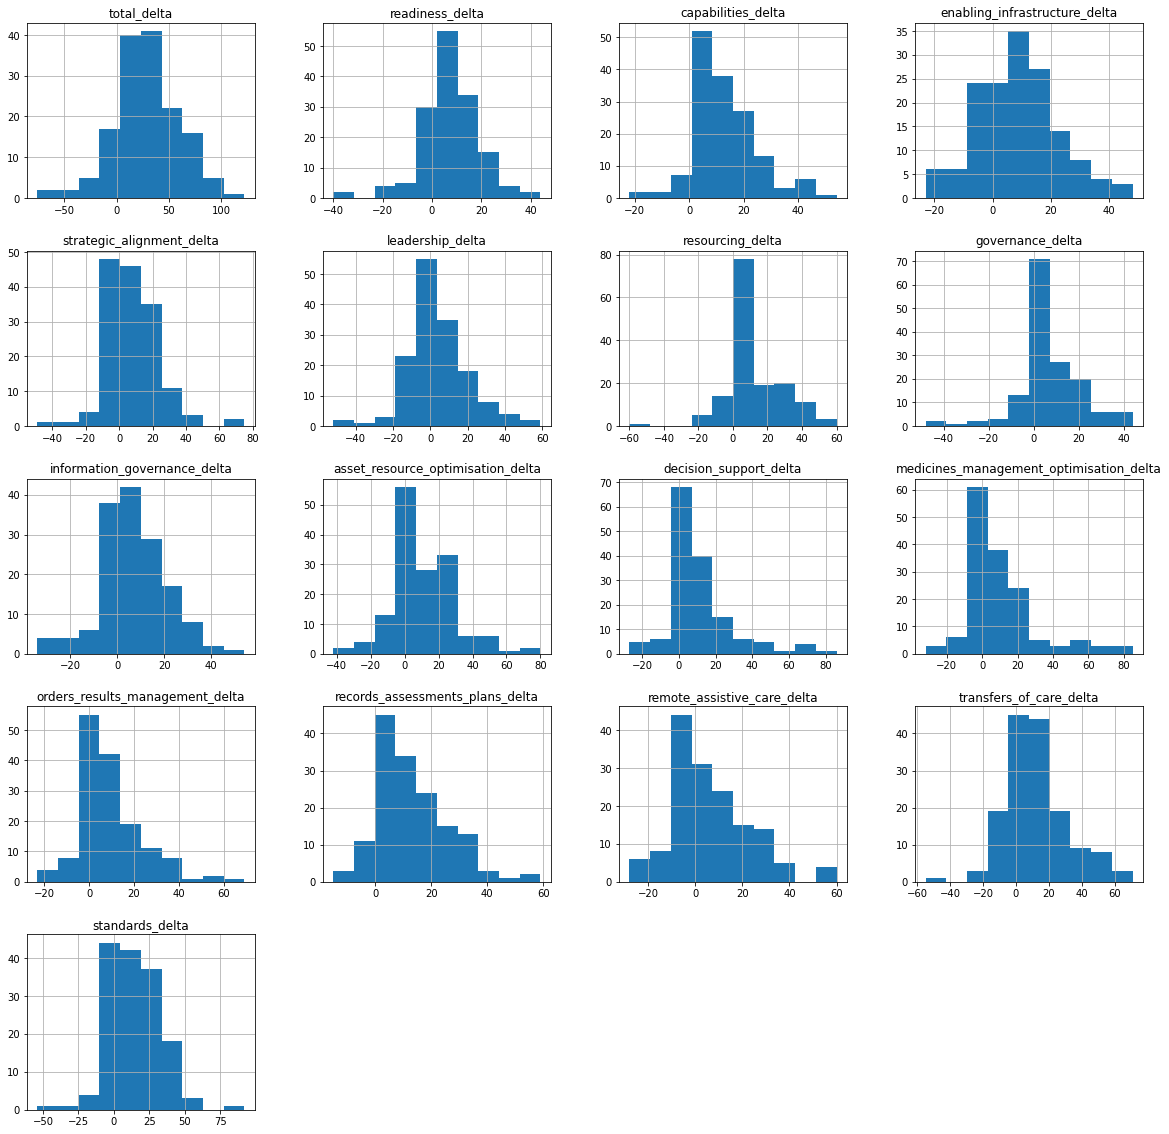

In [24]:
df_histo = df_outcomes[['total_delta', 'readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta',
         'strategic_alignment_delta', 'leadership_delta', 'resourcing_delta', 'governance_delta',
         'information_governance_delta', 'asset_resource_optimisation_delta', 'decision_support_delta',
         'medicines_management_optimisation_delta', 'orders_results_management_delta',
         'records_assessments_plans_delta', 'remote_assistive_care_delta', 'transfers_of_care_delta',
         'standards_delta']]
df_histo.hist(figsize = (20,20))

In [25]:
#only GDEs
df_gde = df_outcomes.loc[(df_outcomes['outcome_gde_total'] == 1.0)]
df_gde = df_gde[[x for x in values]]
#df_gde.boxplot(figsize = (8,6))

In [26]:
#vs non-GDEs
df_non_gde = df_outcomes.loc[(df_outcomes['outcome_gde_total'] == 0)]
df_non_gde = df_non_gde[[x for x in values]]
#df_non_gde.boxplot(figsize = (8,6))

In [27]:
# null hypothesis: GDE (digital funding) results in greater delta change than non-GDE
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
pd.DataFrame([ttest_ind(df_gde[x], df_non_gde[x], alternative='greater') for x in values], index = values, columns = ['stat', 'p-val'])

,stat,p-val
total_delta,-1.014645,0.844040
readiness_delta,0.095635,0.461969
capabilities_delta,-1.157865,0.875614
enabling_infrastructure_delta,-1.430283,0.922635
strategic_alignment_delta,0.003660,0.498542
leadership_delta,-0.980531,0.835793
resourcing_delta,0.452362,0.325833
governance_delta,0.925174,0.178186
information_governance_delta,0.198928,0.421295
asset_resource_optimisation_delta,-0.317469,0.624334


In [28]:
# new EHR Trusts
df_ehr = df_outcomes.loc[(df_outcomes['outcome_ehr_total'] == 1.0)]
df_ehr = df_ehr[[x for x in values]]
#df_ehr.boxplot(figsize = (8,6))

In [29]:
# vs no new EHR Trusts
df_non_ehr = df_outcomes.loc[(df_outcomes['outcome_ehr_total'] == 0)]
df_non_ehr = df_non_ehr[[x for x in values]]
#df_non_ehr.boxplot(figsize = (8,6))

In [30]:
# null hypothesis: new EHR results in greater delta change than no change in EHR
pd.DataFrame([ttest_ind(df_ehr[x], df_non_ehr[x], alternative = 'greater') for x in values], index = values, columns = ['stat', 'p-val'])

,stat,p-val
total_delta,0.331102,0.370516
readiness_delta,-0.643318,0.739497
capabilities_delta,0.763394,0.223218
enabling_infrastructure_delta,0.672361,0.251198
strategic_alignment_delta,-1.148662,0.873732
leadership_delta,-1.744560,0.958438
resourcing_delta,-0.659015,0.744548
governance_delta,0.622850,0.267167
information_governance_delta,0.914945,0.180849
asset_resource_optimisation_delta,-0.343728,0.634232


In [31]:
df_ehr['medicines_management_optimisation_delta'].describe()

count    15.000000
mean     20.666667
std      28.230345
min     -11.000000
25%       2.000000
50%       4.000000
75%      49.500000
max      73.000000
Name: medicines_management_optimisation_delta, dtype: float64

In [32]:
df_ehr['medicines_management_optimisation_delta'].median()

4.0

In [33]:
df_non_ehr['medicines_management_optimisation_delta'].describe()

count    136.000000
mean       9.448529
std       18.304349
min      -32.000000
25%        0.000000
50%        5.000000
75%       15.250000
max       85.000000
Name: medicines_management_optimisation_delta, dtype: float64

In [34]:
df_non_ehr['medicines_management_optimisation_delta'].median()

5.0

In [35]:
df_wannacry = df_outcomes.loc[(df_outcomes['wannacry_any'] == 1.0)]
df_wannacry = df_wannacry[[x for x in values]]
#df_wannacry.boxplot(figsize = (8,6))

In [36]:
df_bad_wannacry = df_outcomes.loc[(df_outcomes['wannacry'] == 1.0)]
df_bad_wannacry = df_bad_wannacry[[x for x in values]]
#df_bad_wannacry.boxplot(figsize = (8,6))

In [37]:
df_non_wannacry = df_outcomes.loc[(df_outcomes['wannacry'] == 0)]
df_non_wannacry = df_non_wannacry[[x for x in values]]
#df_non_wannacry.boxplot(figsize = (8,6))

In [38]:
# null hypothesis: wannacry results in less delta change than trusts free from wannacry
pd.DataFrame([ttest_ind(df_non_wannacry[x], df_wannacry[x], alternative="less") for x in values], index = values, columns = ['stat', 'p-val'])

,stat,p-val
total_delta,-0.283798,0.388447
readiness_delta,0.135588,0.553850
capabilities_delta,-0.297556,0.383193
enabling_infrastructure_delta,-0.520286,0.301753
strategic_alignment_delta,0.267079,0.605142
leadership_delta,0.345848,0.635069
resourcing_delta,0.057572,0.522923
governance_delta,-0.351784,0.362707
information_governance_delta,0.009228,0.503676
asset_resource_optimisation_delta,0.410400,0.658998


In [39]:
#import statistics as stats
#pd.DataFrame([stats.variance(df_outcomes[x].tolist()) for x in values], index = values, columns = ['variance'])
#stats.variance(df_outcomes['total_delta'].tolist())

## drivers for CDMI delta regression

In [40]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [41]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    151 non-null    object 
 1   organisation_name_2016                   151 non-null    object 
 2   outcome_ehr_survey                       151 non-null    float64
 3   outcome_ehr_news                         151 non-null    float64
 4   outcome_ehr_total                        151 non-null    int64  
 5   outcome_gde                              151 non-null    float64
 6   outcome_gde2                             151 non-null    float64
 7   outcome_gde_total                        151 non-null    int64  
 8   wannacry                                 151 non-null    float64
 9   wannacry_minor                           151 non-null    float64
 10  wannacry_any                             151 non-n

In [42]:
X = df_outcomes[['outcome_ehr_total', 'outcome_gde_total', 'wannacry_any', 'foundation_trust', 'financial',
                'ACUTE - LARGE', 'ACUTE - SMALL']] #multivariate themes

#X = df_outcomes[['ACUTE - LARGE', 'ACUTE - MEDIUM', 'ACUTE - SMALL', 'ACUTE - TEACHING']] #multivariate themes

#X = df_outcomes[['outcome_gde_total']]
X.head()

,outcome_ehr_total,outcome_gde_total,wannacry_any,foundation_trust,financial,ACUTE - LARGE,ACUTE - SMALL
0,0,0,0,1,80,0,0
1,0,0,1,1,-2777,0,1
2,0,1,0,1,7858,0,0
3,0,0,1,1,-896,0,0
4,0,0,1,0,-37950,1,0


In [43]:
#Y = df_outcomes[['total_delta']]
Y = df_outcomes[['medicines_management_optimisation_delta']]
Y.head()

,medicines_management_optimisation_delta
0,2.0
1,7.0
2,-2.0
3,1.0
4,0.0


In [44]:
X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                       OLS Regression Results                                      
Dep. Variable:     medicines_management_optimisation_delta   R-squared:                       0.042
Model:                                                 OLS   Adj. R-squared:                 -0.005
Method:                                      Least Squares   F-statistic:                    0.8992
Date:                                     Mon, 31 Jan 2022   Prob (F-statistic):              0.509
Time:                                             12:39:20   Log-Likelihood:                -660.42
No. Observations:                                      151   AIC:                             1337.
Df Residuals:                                          143   BIC:                             1361.
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                         


C:\Users\Joe Z\anaconda3\envs\nlp\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


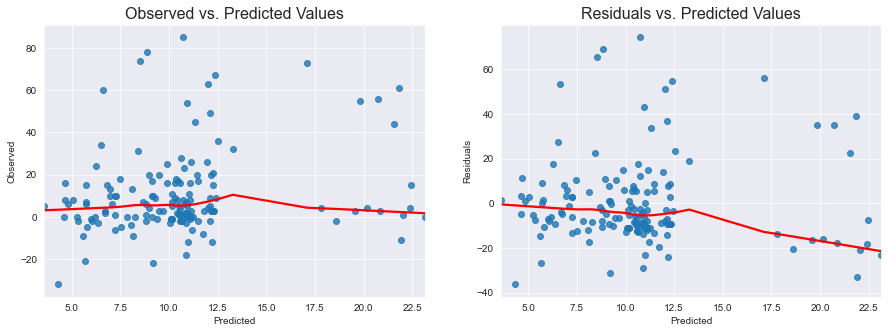

In [45]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 5.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, Y)    

In [46]:
model.resid.mean()

-1.1031152444770397e-11

## ICC analysis

### creating dataframe for ICC analysis

In [47]:
import pingouin as pg
data = pg.read_dataset('icc').rename(columns={"Wine": "themes","Judge": "rater_trust_year" ,"Scores": "score"})
data
##this is example data structure for intraclass correlation analysis in pingouin
##for test-retest reliability, we take number of raters as 2 (trust in 2016, and trust in 2017).
##we use ICC3 (two way mixed effects model to consider raters as "fixed"), so selected raters are the only raters of interest.
##We use absolute agreement between raters in each year.

##https://www.real-statistics.com/reliability/interrater-reliability/intraclass-correlation/icc-for-test-retest-reliability/
##https://www.datanovia.com/en/lessons/intraclass-correlation-coefficient-in-r/

,themes,rater_trust_year,score
0,1,A,1
1,2,A,1
2,3,A,3
3,4,A,6
4,5,A,6
5,6,A,7
6,7,A,8
7,8,A,9
8,1,B,2
9,2,B,3


In [48]:
df_2016_themes_all = pd.read_csv('data/acute/2016_acute_themes.csv')
df_2016_themes_all = df_2016_themes_all.fillna(df_2016_themes_all.mean())

df_2017_themes_all = pd.read_csv('data/acute/2017_acute_themes.csv')
df_2017_themes_all = df_2017_themes_all.fillna(df_2017_themes_all.mean())

<ipython-input-48-304b70a52a01>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2016_themes_all = df_2016_themes_all.fillna(df_2016_themes_all.mean())
<ipython-input-48-304b70a52a01>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2017_themes_all = df_2017_themes_all.fillna(df_2017_themes_all.mean())


In [49]:
df_2016_themes_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   organisation_name                  154 non-null    object 
 1   organisation_id                    154 non-null    object 
 2   readiness                          154 non-null    int64  
 3   capabilities                       154 non-null    int64  
 4   enabling_infrastructure            154 non-null    int64  
 5   strategic_alignment                154 non-null    int64  
 6   leadership                         154 non-null    int64  
 7   resourcing                         154 non-null    int64  
 8   governance                         154 non-null    float64
 9   information_governance             154 non-null    float64
 10  asset_resource_optimisation        154 non-null    int64  
 11  decision_support                   154 non-null    int64  

In [50]:
######## selecting sections and themes ######## 

In [51]:
df_2016_themes = df_2016_themes_all[['organisation_name', 'organisation_id',
                                     'strategic_alignment', 'leadership', 'resourcing', 'governance',
                                     'information_governance', 'asset_resource_optimisation',
                                     'decision_support', 'medicines_management_optimisation',
                                    'orders_results_management', 'records_assessments_plans',
                                    'remote_assistive_care', 'standards', 'transfers_of_care',
                                    'enabling_infrastructure']]

df_2017_themes = df_2017_themes_all[['organisation_name', 'organisation_id',
                                     'strategic_alignment', 'leadership', 'resourcing', 'governance',
                                     'information_governance', 'asset_resource_optimisation',
                                     'decision_support', 'medicines_management_optimisation',
                                    'orders_results_management', 'records_assessments_plans',
                                    'remote_assistive_care', 'standards', 'transfers_of_care',
                                    'enabling_infrastructure']]


In [52]:
###############################################

### stacking 2016 and 2017 so analysis can be performed across columns

In [53]:
##transposing datasets into correct format for pingouin input
t2016 = df_2016_themes.T
t2016.columns = t2016.iloc[1]
t2016 = t2016.drop(['organisation_name', 'organisation_id']).astype(int)

t2017 = df_2017_themes.T
t2017.columns = t2017.iloc[1]
t2017 = t2017.drop(['organisation_name', 'organisation_id']).astype(int)

In [54]:
##generating new columns which contain trustcode_year
t2016b = t2016.add_suffix('_2016')

for x in list(t2016b):
    t2016b[x] = x

t2016b.columns = t2016b.columns.str.replace('_2016', '_name')

In [55]:
##joining to main
df_2016 = pd.concat([t2016, t2016b], axis=1, join='inner')
df_2016 = df_2016.reindex(sorted(df_2016.columns), axis=1).sort_index()
df_2016.head(4)

organisation_id,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDU,RDU_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH8,RH8_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJ7,RJ7_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNL,RNL_name,RNQ,RNQ_name,RNS,RNS_name,RNZ,RNZ_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RPA,RPA_name,RPC,RPC_name,RPY,RPY_name,RQ3,RQ3_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQQ,RQQ_name,RQW,RQW_name,RQX,RQX_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRV,RRV_name,RT3,RT3_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTR,RTR_name,RTX,RTX_name,RVJ,RVJ_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RVY,RVY_name,RW3,RW3_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWP,RWP_name,RWW,RWW_name,RWY,RWY_name,RX1,RX1_name,RXC,RXC_name,RXF,RXF_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXW,RXW_name,RYJ,RYJ_name,RYR,RYR_name
asset_resource_optimisation,50,R1F_2016,45,R1G_2016,35,R1H_2016,60,R1K_2016,25,RA2_2016,25,RA3_2016,40,RA4_2016,50,RA7_2016,50,RAE_2016,45,RAJ_2016,35,RAL_2016,0,RAN_2016,50,RAP_2016,50,RAS_2016,45,RAX_2016,45,RBA_2016,70,RBD_2016,45,RBK_2016,80,RBL_2016,15,RBN_2016,60,RBQ_2016,45,RBS_2016,25,RBT_2016,10,RBV_2016,45,RBZ_2016,60,RC1_2016,65,RC9_2016,65,RCB_2016,40,RCD_2016,60,RCF_2016,0,RCU_2016,15,RCX_2016,50,RD1_2016,40,RD3_2016,40,RD8_2016,50,RDD_2016,65,RDE_2016,80,RDU_2016,55,RDZ_2016,55,RE9_2016,40,REF_2016,60,REM_2016,70,REN_2016,65,REP_2016,65,RET_2016,35,RF4_2016,35,RFF_2016,10,RFR_2016,45,RFS_2016,45,RGM_2016,70,RGN_2016,30,RGP_2016,55,RGQ_2016,30,RGR_2016,95,RGT_2016,75,RH8_2016,50,RHM_2016,55,RHQ_2016,10,RHU_2016,45,RHW_2016,60,RJ1_2016,40,RJ2_2016,70,RJ6_2016,60,RJ7_2016,30,RJC_2016,65,RJE_2016,30,RJF_2016,80,RJL_2016,40,RJN_2016,25,RJR_2016,45,RJZ_2016,40,RK5_2016,65,RK9_2016,35,RKB_2016,35,RKE_2016,15,RL1_2016,80,RL4_2016,40,RLN_2016,30,RLQ_2016,40,RLT_2016,40,RLU_2016,25,RM1_2016,20,RM2_2016,80,RM3_2016,50,RMC_2016,45,RMP_2016,45,RN3_2016,30,RN5_2016,40,RN7_2016,40,RNA_2016,30,RNL_2016,70,RNQ_2016,50,RNS_2016,25,RNZ_2016,55,RP4_2016,30,RP5_2016,6,RP6_2016,15,RPA_2016,55,RPC_2016,45,RPY_2016,65,RQ3_2016,60,RQ6_2016,30,RQ8_2016,65,RQM_2016,50,RQQ_2016,25,RQW_2016,70,RQX_2016,50,RR1_2016,40,RR7_2016,75,RR8_2016,25,RRF_2016,15,RRJ_2016,65,RRK_2016,25,RRV_2016,10,RT3_2016,45,RTD_2016,35,RTE_2016,15,RTF_2016,75,RTG_2016,70,RTH_2016,60,RTK_2016,60,RTP_2016,40,RTR_2016,45,RTX_2016,65,RVJ_2016,35,RVR_2016,35,RVV_2016,75,RVW_2016,45,RVY_2016,60,RW3_2016,45,RW6_2016,30,RWA_2016,35,RWD_2016,75,RWE_2016,35,RWF_2016,15,RWG_2016,40,RWH_2016,50,RWJ_2016,50,RWP_2016,60,RWW_2016,35,RWY_2016,50,RX1_2016,30,RXC_2016,40,RXF_2016,55,RXH_2016,45,RXK_2016,30,RXL_2016,65,RXN_2016,45,RXP_2016,40,RXQ_2016,40,RXR_2016,50,RXW_2016,45,RYJ_2016,45,RYR_2016
decision_support,46,R1F_2016,25,R1G_2016,39,R1H_2016,39,R1K_2016,22,RA2_2016,0,RA3_2016,31,RA4_2016,45,RA7_20

In [56]:
##generating new columns which contain trustcode_year
t2017b = t2017.add_suffix('_2017')

for x in list(t2017b):
    t2017b[x] = x
    
t2017b.columns = t2017b.columns.str.replace('_2017', '_name')

In [57]:
##joining to main
df_2017 = pd.concat([t2017, t2017b], axis=1, join='inner')
df_2017 = df_2017.reindex(sorted(df_2017.columns), axis=1).sort_index()
df_2017.head(4)

organisation_id,R1A,R1A_name,R1C,R1C_name,R1D,R1D_name,R1E,R1E_name,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1J,R1J_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAT,RAT_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDR,RDR_name,RDU,RDU_name,RDY,RDY_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGD,RGD_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH5,RH5_name,RH8,RH8_name,RHA,RHA_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJ8,RJ8_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RKL,RKL_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RLY,RLY_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RMY,RMY_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNK,RNK_name,RNL,RNL_name,RNN,RNN_name,RNQ,RNQ_name,RNS,RNS_name,RNU,RNU_name,RNZ,RNZ_name,RP1,RP1_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RP7,RP7_name,RPA,RPA_name,RPC,RPC_name,RPG,RPG_name,RPY,RPY_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQW,RQW_name,RQX,RQX_name,RQY,RQY_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRE,RRE_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRP,RRP_name,RRV,RRV_name,RT1,RT1_name,RT2,RT2_name,RT3,RT3_name,RT5,RT5_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTQ,RTQ_name,RTR,RTR_name,RTV,RTV_name,RTX,RTX_name,RV3,RV3_name,RV5,RV5_name,RV9,RV9_name,RVJ,RVJ_name,RVN,RVN_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RVY,RVY_name,RW1,RW1_name,RW3,RW3_name,RW4,RW4_name,RW5,RW5_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWK,RWK_name,RWN,RWN_name,RWP,RWP_name,RWR,RWR_name,RWV,RWV_name,RWW,RWW_name,RWX,RWX_name,RWY,RWY_name,RX1,RX1_name,RX2,RX2_name,RX3,RX3_name,RX4,RX4_name,RXA,RXA_name,RXC,RXC_name,RXE,RXE_name,RXF,RXF_name,RXG,RXG_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXM,RXM_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXT,RXT_name,RXV,RXV_name,RXW,RXW_name,RXX,RXX_name,RXY,RXY_name,RY1,RY1_name,RY2,RY2_name,RY3,RY3_name,RY4,RY4_name,RY5,RY5_name,RY6,RY6_name,RY7,RY7_name,RY8,RY8_name,RY9,RY9_name,RYG,RYG_name,RYJ,RYJ_name,RYK,RYK_name,RYR,RYR_name,RYV,RYV_name,RYW,RYW_name,RYX,RYX_name,RYY,RYY_name,TAD,TAD_name,TAF,TAF_name,TAH,TAH_name,TAJ,TAJ_name
asset_resource_optimisation,46,R1A_2017,57,R1C_2017,6,R1D_2017,50,R1E_2017,34,R1F_2017,43,R1G_2017,43,R1H_2017,63,R1J_2017,52,R1K_2017,55,RA2_2017,25,RA3_2017,65,RA4_2017,60,RA7_2017,70,RAE_2017,55,RAJ_2017,35,RAL_2017,45,RAN_2017,40,RAP_2017,50,RAS_2017,71,RAT_2017,60,RAX_2017,60,RBA_2017,75,RBD_2017,46,RBK_2017,85,RBL_2017,65,RBN_2017,95,RBQ_2017,36,RBS_2017,25,RBT_2017,90,RBV_2017,61,RBZ_2017,75,RC1_2017,80,RC9_2017,61,RCB_2017,54,RCD_2017,57,RCF_2017,29,RCU_2017,25,RCX_2017,63,RD1_2017,20,RD3_2017,40,RD8_2017,95,RDD_2017,85,RDE_2017,69,RDR_2017,61,RDU_2017,54,RDY_2017,50,RDZ_2017,46,RE9_2017,70,REF_2017,60,REM_2017,75,REN_2017,71,REP_2017,70,RET_2017,40,RF4_2017,50,RFF_2017,57,RFR_2017,50,RFS_2017,40,RGD_2017,85,RGM_2017,60,RGN_2017,30,RGP_2017,60,RGQ_2017,50,RGR_2017,100,RGT_2017,50,RH5_2017,57,RH8_2017,32,RHA_2017,70,RHM_2017,61,RHQ_2017,30,RHU_2017,55,RHW_2017,18,RJ1_2017,55,RJ2_2017,64,RJ6_2017,43,RJ8_2017,52,RJC_2017,47,RJE_2017,90,RJF_2017,64,RJL_2017,50,RJN_2017,80,RJR_2017,45,RJZ_2017,70,RK5_2017,86,RK9_2017,55,RKB_2017,64,RKE_2017,20,RKL_2017,30,RL1_2017,79,RL4_2017,65

In [58]:
# primary dataset for analysis, dropping trusts that don't match (based on number of NaN)

df_joined = pd.concat([df_2016, df_2017])
df_joined = df_joined[[x for x in df_joined if df_joined[x].isnull().sum() < 1]]
df_joined

organisation_id,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDU,RDU_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH8,RH8_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNL,RNL_name,RNQ,RNQ_name,RNS,RNS_name,RNZ,RNZ_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RPA,RPA_name,RPC,RPC_name,RPY,RPY_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQW,RQW_name,RQX,RQX_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRV,RRV_name,RT3,RT3_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTR,RTR_name,RTX,RTX_name,RVJ,RVJ_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RVY,RVY_name,RW3,RW3_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWP,RWP_name,RWW,RWW_name,RWY,RWY_name,RX1,RX1_name,RXC,RXC_name,RXF,RXF_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXW,RXW_name,RYJ,RYJ_name,RYR,RYR_name
asset_resource_optimisation,50,R1F_2016,45,R1G_2016,35,R1H_2016,60,R1K_2016,25,RA2_2016,25,RA3_2016,40,RA4_2016,50,RA7_2016,50,RAE_2016,45,RAJ_2016,35,RAL_2016,0,RAN_2016,50,RAP_2016,50,RAS_2016,45,RAX_2016,45,RBA_2016,70,RBD_2016,45,RBK_2016,80,RBL_2016,15,RBN_2016,60,RBQ_2016,45,RBS_2016,25,RBT_2016,10,RBV_2016,45,RBZ_2016,60,RC1_2016,65,RC9_2016,65,RCB_2016,40,RCD_2016,60,RCF_2016,0,RCU_2016,15,RCX_2016,50,RD1_2016,40,RD3_2016,40,RD8_2016,50,RDD_2016,65,RDE_2016,80,RDU_2016,55,RDZ_2016,55,RE9_2016,40,REF_2016,60,REM_2016,70,REN_2016,65,REP_2016,65,RET_2016,35,RF4_2016,35,RFF_2016,10,RFR_2016,45,RFS_2016,45,RGM_2016,70,RGN_2016,30,RGP_2016,55,RGQ_2016,30,RGR_2016,95,RGT_2016,75,RH8_2016,50,RHM_2016,55,RHQ_2016,10,RHU_2016,45,RHW_2016,60,RJ1_2016,40,RJ2_2016,70,RJ6_2016,30,RJC_2016,65,RJE_2016,30,RJF_2016,80,RJL_2016,40,RJN_2016,25,RJR_2016,45,RJZ_2016,40,RK5_2016,65,RK9_2016,35,RKB_2016,35,RKE_2016,15,RL1_2016,80,RL4_2016,40,RLN_2016,30,RLQ_2016,40,RLT_2016,40,RLU_2016,25,RM1_2016,20,RM2_2016,80,RM3_2016,50,RMC_2016,45,RMP_2016,45,RN3_2016,30,RN5_2016,40,RN7_2016,40,RNA_2016,30,RNL_2016,70,RNQ_2016,50,RNS_2016,25,RNZ_2016,55,RP4_2016,30,RP5_2016,6,RP6_2016,15,RPA_2016,55,RPC_2016,45,RPY_2016,60,RQ6_2016,30,RQ8_2016,65,RQM_2016,25,RQW_2016,70,RQX_2016,50,RR1_2016,40,RR7_2016,75,RR8_2016,25,RRF_2016,15,RRJ_2016,65,RRK_2016,25,RRV_2016,10,RT3_2016,45,RTD_2016,35,RTE_2016,15,RTF_2016,75,RTG_2016,70,RTH_2016,60,RTK_2016,60,RTP_2016,40,RTR_2016,45,RTX_2016,65,RVJ_2016,35,RVR_2016,35,RVV_2016,75,RVW_2016,45,RVY_2016,60,RW3_2016,45,RW6_2016,30,RWA_2016,35,RWD_2016,75,RWE_2016,35,RWF_2016,15,RWG_2016,40,RWH_2016,50,RWJ_2016,50,RWP_2016,60,RWW_2016,35,RWY_2016,50,RX1_2016,30,RXC_2016,40,RXF_2016,55,RXH_2016,45,RXK_2016,30,RXL_2016,65,RXN_2016,45,RXP_2016,40,RXQ_2016,40,RXR_2016,50,RXW_2016,45,RYJ_2016,45,RYR_2016
decision_support,46,R1F_2016,25,R1G_2016,39,R1H_2016,39,R1K_2016,22,RA2_2016,0,RA3_2016,31,RA4_2016,45,RA7_2016,23,RAE_2016,44,RAJ_2016,22,RAL_2016,17,RAN_2016,39,RAP_2016,23,RAS_2016,

In [59]:
len(df_joined.columns)

302

### iterating through df_joined column groups and calculating ICC for each Trust

In [60]:
# create list of Trusts that will ultimately hold sectioned dataframes

codelist = list(df_joined.columns[::2])
codelist[0:5]

['R1F', 'R1G', 'R1H', 'R1K', 'RA2']

In [61]:
trustlist = codelist.copy()
icclist = codelist.copy()

In [62]:
##analysis-ready dataframe inserted into list per trust position

for i in range(0, len(df_joined.columns), 2):
    j = int(i/2)
    trustlist[j] = df_joined.iloc[:,i:i + 2]
    trustlist[j].columns = ['ratings', 'raters']
    trustlist[j]['theme'] = trustlist[j].index

In [63]:
##pg intraclass_corr performed for each trust df at each list position
for j in range(0, len(icclist)):
    icclist[j] = pg.intraclass_corr(data=trustlist[j], targets='theme', raters='raters', ratings='ratings').round(3)

In [64]:
icclist[1]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.706,5.798,13,14,0.001,"[0.32, 0.89]"
1,ICC2,Single random raters,0.722,9.508,13,13,0.000,"[0.17, 0.91]"
2,ICC3,Single fixed raters,0.810,9.508,13,13,0.000,"[0.51, 0.93]"
3,ICC1k,Average raters absolute,0.828,5.798,13,14,0.001,"[0.48, 0.94]"
4,ICC2k,Average random raters,0.838,9.508,13,13,0.000,"[0.29, 0.95]"
5,ICC3k,Average fixed raters,0.895,9.508,13,13,0.000,"[0.67, 0.97]"


In [65]:
##takes ICC3 (result of note) and creates new Trust linked df

icc_df = pd.DataFrame(columns = ['Type', 'Description', 'ICC', 'F', 'df1', 'df2', 'pval', 'CI95%']) 

for j in range(0, len(icclist)):
    icc_df = icc_df.append(icclist[j].iloc[2:3,:])

icc_df['Trust'] = codelist

In [66]:
icc_df = pd.concat([icc_df.set_index('Trust'),
           outcomes.set_index('index')], axis=1, join='inner').reset_index()

icc_df = icc_df.fillna(0) ##fill nulls in binary columns with 0

In [67]:
icc_df['ICC'].median()

0.841

In [68]:
icc_df
icc_df.describe()

,ICC,F,df1,df2,pval,outcome_ehr_survey,outcome_ehr_news,outcome_ehr_total,outcome_gde,outcome_gde2,outcome_gde_total,wannacry,wannacry_minor,wannacry_any,foundation_trust,financial
count,151.000000,151.000000,151.0,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.795179,19.060834,13.0,13.0,0.009490,0.052980,0.046358,0.099338,0.079470,0.026490,0.105960,0.165563,0.198675,0.364238,0.529801,-6983.927152
std,0.167051,22.031306,0.0,0.0,0.053751,0.224739,0.210958,0.300110,0.271371,0.161122,0.308811,0.372925,0.400331,0.482817,0.500772,13407.377460
min,-0.096000,0.826000,13.0,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-79642.000000
25%,0.708500,5.859000,13.0,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12011.500000
50%,0.841000,11.597000,13.0,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3600.000000
75%,0.916500,23.020000,13.0,13.0,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,407.500000
max,0.984000,125.386000,13.0,13.0,0.633000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18100.000000


In [69]:
#icc_df.to_csv('output/icc.csv')

## Loading response ICC data

In [134]:
icc_join = pd.read_csv('output/icc_join_questions.csv', index_col=0)
icc_join = icc_join.rename(columns={"Trust": "index"})

<AxesSubplot:>

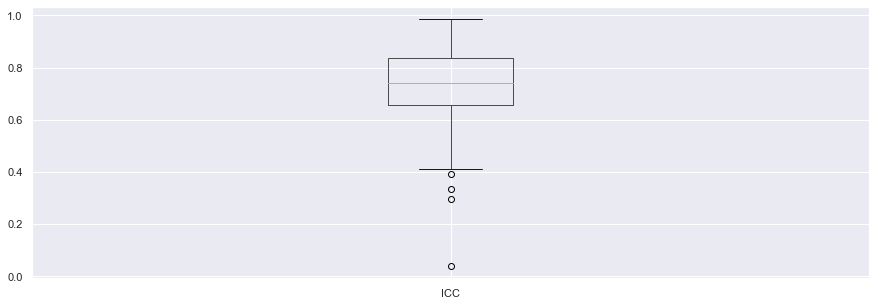

In [135]:
icc_join.boxplot()

## Combine outcomes data with ICC data into heatmap

In [136]:
## this line uses original ICC calculated from section scores
#icc_join = icc_df[['index', 'ICC']].copy()

In [137]:
heatmap_join = df_outcomes[['index', 'total_delta', 'readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta',
         'strategic_alignment_delta', 'leadership_delta', 'resourcing_delta', 'governance_delta',
         'information_governance_delta', 'asset_resource_optimisation_delta', 'decision_support_delta',
         'medicines_management_optimisation_delta', 'orders_results_management_delta',
         'records_assessments_plans_delta', 'remote_assistive_care_delta', 'transfers_of_care_delta',
         'standards_delta', 'outcome_gde_total', 'outcome_ehr_total', 'wannacry']]

In [138]:
heatmap_icc = heatmap_join.merge(icc_join, on= 'index', how='left')

In [139]:
## scales these binary measures so that 1 = 100, and 0 = 0
exposures = ('outcome_gde_total', 'outcome_ehr_total', 'wannacry')

for x in exposures:
    heatmap_icc[x] = heatmap_icc[x]*100

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, +100))

heatmap_icc['icc_scaled'] = scaler.fit_transform(heatmap_icc[['ICC']]) ## scale ICC to 0 to 100

In [141]:
heatmap_icc['icc_scaled'] = heatmap_icc['icc_scaled'].fillna(heatmap_icc['icc_scaled'].mean())

In [142]:
heatmap_icc = heatmap_icc.set_index('index', drop=True) ## index as Trust codes

heatmap_icc.drop('RJF', inplace=True) ## aberrant ICC calculation
heatmap_icc.drop(['ICC'], axis=1, inplace=True) ## drop non-scaled ICC

heatmap_icc = heatmap_icc.sort_values(by=['icc_scaled'], ascending=False) ## sort for heatmap presentation

In [143]:
## move icc_scaled column to the front!
heatmap_icc = heatmap_icc[['icc_scaled'] + [ col for col in heatmap_icc.columns if col != 'icc_scaled' ]]

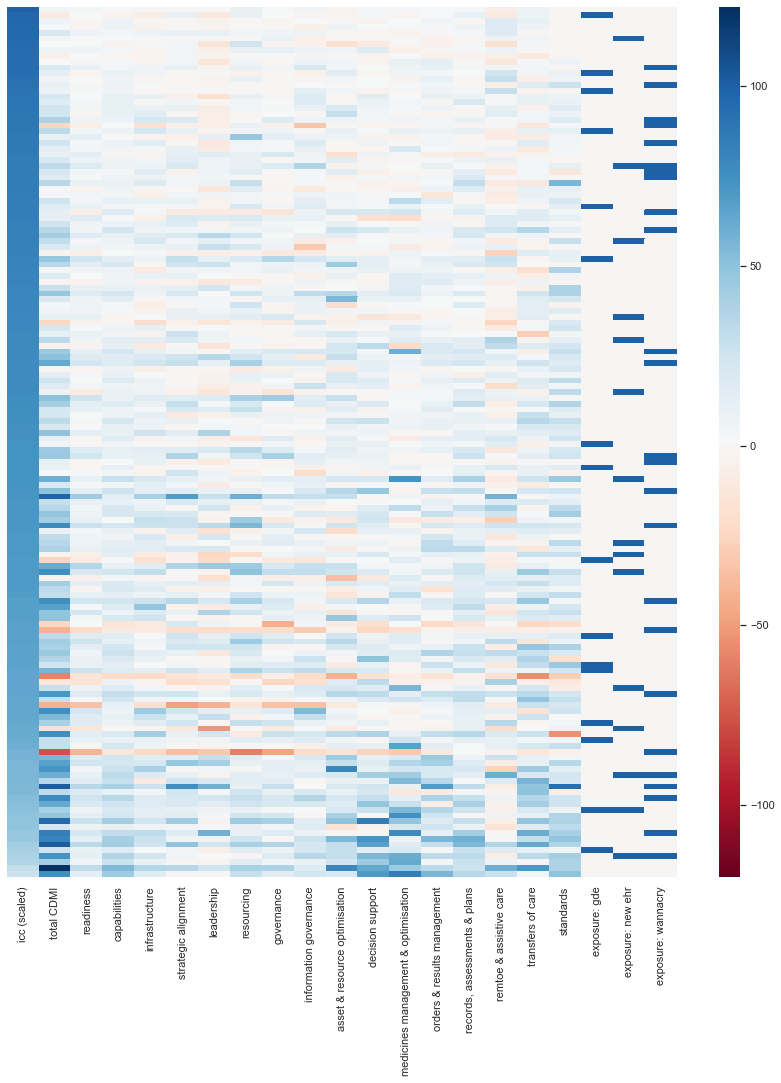

In [145]:
fig, ax1 = plt.subplots()

xlabels = ('icc (scaled)', 'total CDMI', 'readiness', 'capabilities', 'infrastructure', 'strategic alignment', 'leadership', 'resourcing', 'governance',
'information governance', 'asset & resource optimisation', 'decision support', 'medicines management & optimisation', 
'orders & results management', 'records, assessments & plans', 'remtoe & assistive care', 'transfers of care',
'standards', 'exposure: gde', 'exposure: new ehr', 'exposure: wannacry', )

sns.set(font_scale=1)

#ax1.xaxis.set_ticks_position('bottom')
#ax1.yaxis.set_ticks_position('left')

ax1 = sns.heatmap(heatmap_icc, cmap="RdBu", yticklabels=False, xticklabels=xlabels, annot=False, vmin=-120,
                 cbar_kws={"aspect": 40})

ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(15,16)

plt.show()

fig.savefig('output/figure_2.png', bbox_inches="tight")

### subset low ICC

In [146]:
heatmap_icc_2 = heatmap_icc[heatmap_icc['icc_scaled'] < 75]

In [147]:
heatmap_icc_2 = heatmap_icc_2.sort_values(by=['total_delta'], ascending=False)

In [148]:
ttest_ind(heatmap_icc_2['readiness_delta'], heatmap_icc_2['capabilities_delta'])

Ttest_indResult(statistic=-3.338530753874191, pvalue=0.001053343343726127)

In [158]:
ttest_ind(heatmap_icc_2['enabling_infrastructure_delta'], heatmap_icc_2['capabilities_delta'])

Ttest_indResult(statistic=-2.0358789679694946, pvalue=0.04345441933866694)

In [151]:
heatmap_icc_2.median()

icc_scaled                                 66.174921
total_delta                                40.000000
readiness_delta                            11.000000
capabilities_delta                         16.000000
enabling_infrastructure_delta              13.000000
strategic_alignment_delta                  10.000000
leadership_delta                            4.000000
resourcing_delta                           10.000000
governance_delta                            8.000000
information_governance_delta                9.000000
asset_resource_optimisation_delta          11.000000
decision_support_delta                     11.000000
medicines_management_optimisation_delta     9.000000
orders_results_management_delta            10.000000
records_assessments_plans_delta            14.000000
remote_assistive_care_delta                 7.000000
transfers_of_care_delta                    16.000000
standards_delta                            20.000000
outcome_gde_total                           0.

In [152]:
heatmap_icc_2.describe()

,icc_scaled,total_delta,readiness_delta,capabilities_delta,enabling_infrastructure_delta,strategic_alignment_delta,leadership_delta,resourcing_delta,governance_delta,information_governance_delta,asset_resource_optimisation_delta,decision_support_delta,medicines_management_optimisation_delta,orders_results_management_delta,records_assessments_plans_delta,remote_assistive_care_delta,transfers_of_care_delta,standards_delta,outcome_gde_total,outcome_ehr_total,wannacry
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,63.099312,39.063291,9.620253,17.037975,12.405063,11.759494,6.189873,12.265823,8.468354,8.784810,13.177215,16.075949,15.936709,13.215190,17.417722,7.835443,17.683544,17.708861,12.658228,11.392405,16.455696
std,10.573668,36.661774,14.516396,13.389091,15.160271,19.344525,19.778955,19.802039,16.418279,15.432791,21.402588,21.741354,23.927423,17.645128,13.998725,18.574473,21.741219,20.595090,33.462909,31.974917,37.314944
min,27.081138,-76.000000,-40.000000,-22.000000,-23.000000,-49.000000,-52.000000,-60.000000,-48.000000,-34.000000,-42.000000,-27.000000,-32.000000,-23.000000,-15.000000,-28.000000,-55.000000,-54.000000,0.000000,0.000000,0.000000
25%,57.323498,25.500000,2.000000,10.500000,3.500000,0.000000,-3.000000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000,0.000000,8.500000,-5.500000,4.000000,4.000000,0.000000,0.000000,0.000000
50%,66.174921,40.000000,11.000000,16.000000,13.000000,10.000000,4.000000,10.000000,8.000000,9.000000,11.000000,11.000000,9.000000,10.000000,14.000000,7.000000,16.000000,20.000000,0.000000,0.000000,0.000000
75%,70.916754,62.500000,17.000000,24.000000,22.500000,22.000000,19.500000,25.000000,18.000000,20.000000,25.000000,23.000000,24.000000,25.000000,28.000000,17.500000,30.000000,30.000000,0.000000,0.000000,0.000000
max,74.815595,122.000000,44.000000,54.000000,48.000000,75.000000,59.000000,60.000000,40.000000,54.000000,80.000000,86.000000,85.000000,69.000000,59.000000,60.000000,71.000000,92.000000,100.000000,100.000000,100.000000


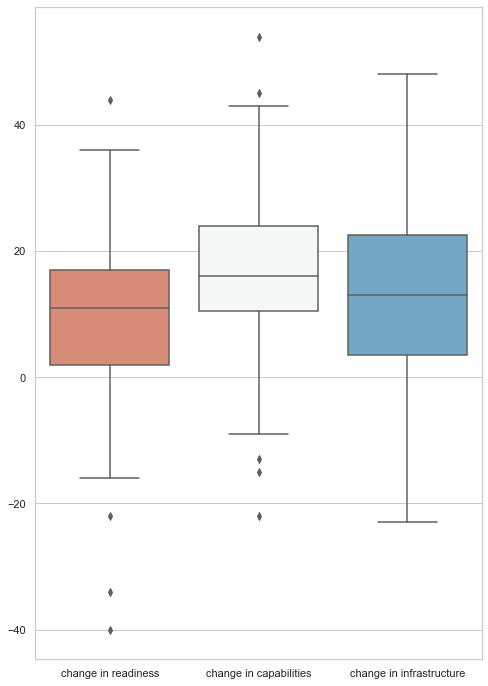

In [180]:
fig, ax1 = plt.subplots()

xlabels = ('change in readiness', 'change in capabilities', 'change in infrastructure')

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.color_palette("RdBu", as_cmap=True)

ax1 = sns.boxplot(data=heatmap_icc_2[['readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']],
                 palette="RdBu")

ax1.set_xticklabels(xlabels)
ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(8,12)


plt.show()

fig.savefig('output/figure_3.png', bbox_inches="tight")

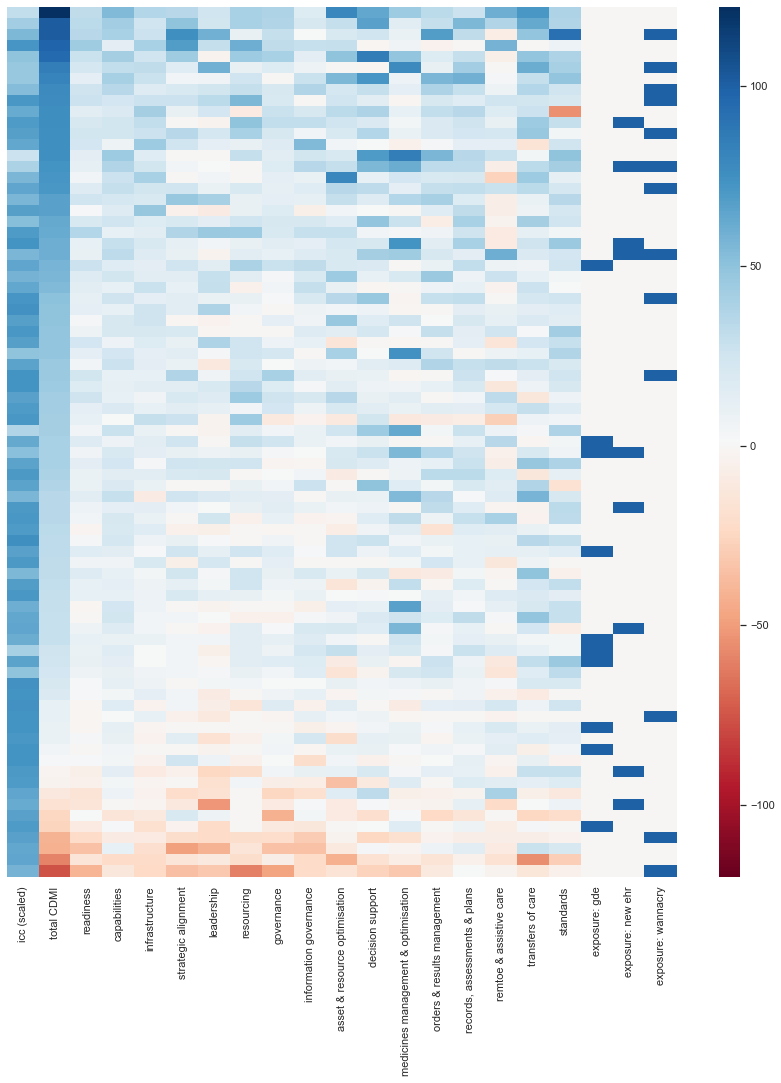

In [175]:
fig, ax1 = plt.subplots()

xlabels = ('icc (scaled)', 'total CDMI', 'readiness', 'capabilities', 'infrastructure', 'strategic alignment', 'leadership', 'resourcing', 'governance',
'information governance', 'asset & resource optimisation', 'decision support', 'medicines management & optimisation', 
'orders & results management', 'records, assessments & plans', 'remtoe & assistive care', 'transfers of care',
'standards', 'exposure: gde', 'exposure: new ehr', 'exposure: wannacry', )

sns.set(font_scale=1)

#ax1.xaxis.set_ticks_position('bottom')
#ax1.yaxis.set_ticks_position('left')

ax1 = sns.heatmap(heatmap_icc_2, cmap="RdBu", yticklabels=False, xticklabels=xlabels, annot=False, vmin=-120,
                 cbar_kws={"aspect": 40})

ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(15,16)

plt.show()

fig.savefig('output/figure_s5.png', bbox_inches="tight")

In [171]:
heatmap_icc_2.var()

icc_scaled                                   84.800164
total_delta                                1949.963054
readiness_delta                             331.027094
capabilities_delta                          245.051724
enabling_infrastructure_delta               308.364532
strategic_alignment_delta                   687.615764
leadership_delta                            602.935961
resourcing_delta                            512.684729
governance_delta                            376.669951
information_governance_delta                331.827586
asset_resource_optimisation_delta           640.741379
decision_support_delta                      786.100985
medicines_management_optimisation_delta     973.214286
orders_results_management_delta             428.921182
records_assessments_plans_delta             287.221675
remote_assistive_care_delta                 463.876847
transfers_of_care_delta                     689.177340
standards_delta                             639.364532
outcome_gd

### subset cdmi net decrease / increase

In [161]:
heatmap_net_low = heatmap_icc_2[heatmap_icc_2['total_delta'] < 0]

In [162]:
heatmap_net_low.describe()

,icc_scaled,total_delta,readiness_delta,capabilities_delta,enabling_infrastructure_delta,strategic_alignment_delta,leadership_delta,resourcing_delta,governance_delta,information_governance_delta,asset_resource_optimisation_delta,decision_support_delta,medicines_management_optimisation_delta,orders_results_management_delta,records_assessments_plans_delta,remote_assistive_care_delta,transfers_of_care_delta,standards_delta,outcome_gde_total,outcome_ehr_total,wannacry
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,65.795574,-30.300000,-16.200000,-2.000000,-12.100000,-14.100000,-23.200000,-13.000000,-20.000000,-13.100000,-10.00000,-3.900000,-3.000000,-4.100000,3.400000,-1.70000,-3.20000,0.500000,10.000000,20.000000,20.000000
std,3.709341,24.193893,12.839176,12.110601,8.020114,19.116311,16.171305,19.321836,17.107503,14.850739,18.11077,19.513243,14.621141,10.650509,10.834103,17.68898,24.90783,18.662202,31.622777,42.163702,42.163702
min,58.482613,-76.000000,-40.000000,-22.000000,-23.000000,-49.000000,-52.000000,-60.000000,-48.000000,-34.000000,-42.00000,-27.000000,-32.000000,-23.000000,-15.000000,-22.00000,-55.00000,-29.000000,0.000000,0.000000,0.000000
25%,64.067439,-41.750000,-20.500000,-12.000000,-18.750000,-20.750000,-30.000000,-20.000000,-31.750000,-22.000000,-14.75000,-18.500000,-7.500000,-9.500000,-4.500000,-9.50000,-12.25000,-10.250000,0.000000,0.000000,0.000000
50%,66.016860,-25.500000,-15.000000,1.000000,-10.500000,-13.500000,-22.000000,-7.500000,-16.000000,-15.500000,-10.00000,-5.000000,-2.000000,-3.500000,4.000000,-6.00000,-2.50000,-2.000000,0.000000,0.000000,0.000000
75%,68.861960,-13.250000,-7.000000,7.000000,-5.500000,-4.250000,-17.250000,0.000000,-7.750000,-0.500000,-0.75000,2.750000,2.750000,0.000000,11.750000,-0.75000,10.50000,15.500000,0.000000,0.000000,0.000000
max,70.284510,-2.000000,1.000000,14.000000,-2.000000,20.000000,7.000000,5.000000,5.000000,10.000000,16.00000,33.000000,17.000000,13.000000,18.000000,40.00000,29.00000,29.000000,100.000000,100.000000,100.000000


In [163]:
heatmap_net_low.median()

icc_scaled                                 66.01686
total_delta                               -25.50000
readiness_delta                           -15.00000
capabilities_delta                          1.00000
enabling_infrastructure_delta             -10.50000
strategic_alignment_delta                 -13.50000
leadership_delta                          -22.00000
resourcing_delta                           -7.50000
governance_delta                          -16.00000
information_governance_delta              -15.50000
asset_resource_optimisation_delta         -10.00000
decision_support_delta                     -5.00000
medicines_management_optimisation_delta    -2.00000
orders_results_management_delta            -3.50000
records_assessments_plans_delta             4.00000
remote_assistive_care_delta                -6.00000
transfers_of_care_delta                    -2.50000
standards_delta                            -2.00000
outcome_gde_total                           0.00000
outcome_ehr_

In [191]:
ttest_ind(heatmap_net_low['readiness_delta'], heatmap_net_low['capabilities_delta'], alternative="less")

Ttest_indResult(statistic=-2.544201904892329, pvalue=0.010172415255016536)

In [192]:
ttest_ind(heatmap_net_low['capabilities_delta'], heatmap_net_low['enabling_infrastructure_delta'], alternative="greater")

Ttest_indResult(statistic=2.198829633300395, pvalue=0.02060228297934114)

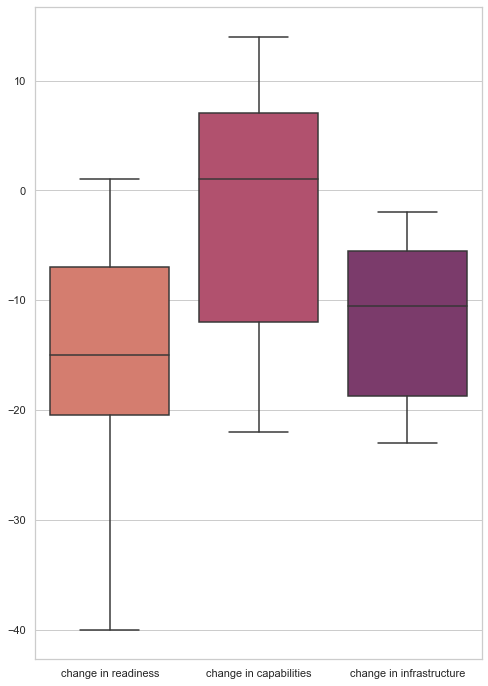

In [166]:
fig, ax1 = plt.subplots()

xlabels = ('change in readiness', 'change in capabilities', 'change in infrastructure')

sns.set(font_scale=1)
sns.color_palette("flare", as_cmap=True)

ax1 = sns.boxplot(data=heatmap_net_low[['readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']],
                 palette="flare")

ax1.set_xticklabels(xlabels)
ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(8,12)

sns.set_style("whitegrid")
plt.show()

#fig.savefig('output/figure_s4.png', bbox_inches="tight")

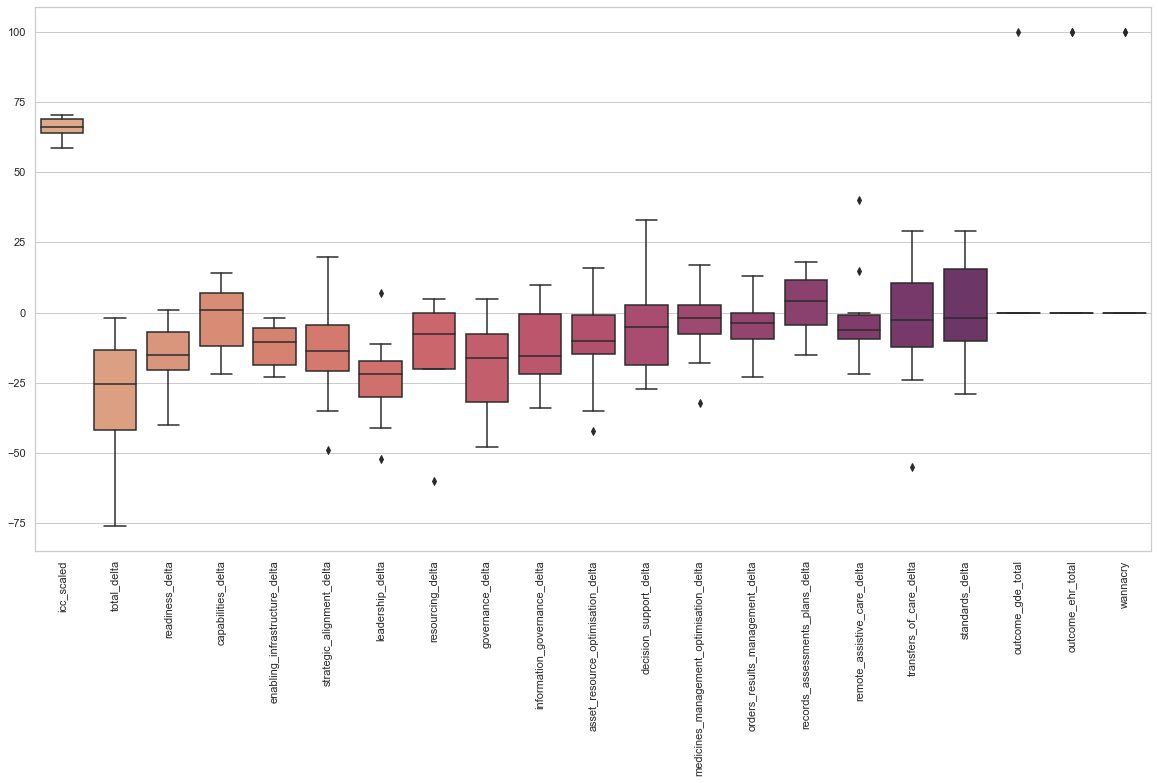

In [167]:
fig, ax1 = plt.subplots()

sns.set(font_scale=1)
sns.color_palette("flare", as_cmap=True)

ax1 = sns.boxplot(data=heatmap_net_low,
                 palette="flare")

ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

fig.set_size_inches(20,10)

sns.set_style("whitegrid")
plt.show()

#fig.savefig('output/figure_s4.png', bbox_inches="tight")

In [193]:
heatmap_net_high = heatmap_icc_2[heatmap_icc_2['total_delta'] > 0]

In [194]:
heatmap_net_high.describe()

,icc_scaled,total_delta,readiness_delta,capabilities_delta,enabling_infrastructure_delta,strategic_alignment_delta,leadership_delta,resourcing_delta,governance_delta,information_governance_delta,asset_resource_optimisation_delta,decision_support_delta,medicines_management_optimisation_delta,orders_results_management_delta,records_assessments_plans_delta,remote_assistive_care_delta,transfers_of_care_delta,standards_delta,outcome_gde_total,outcome_ehr_total,wannacry
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,62.708549,49.115942,13.362319,19.797101,15.956522,15.507246,10.449275,15.927536,12.594203,11.956522,16.536232,18.971014,18.681159,15.724638,19.449275,9.217391,20.710145,20.202899,13.043478,10.144928,15.942029
std,11.189230,25.577182,10.375269,11.188991,12.410189,16.379348,16.391835,17.114080,11.576242,12.781460,19.788276,20.606232,23.833672,17.077577,13.272635,18.412647,19.663419,19.762993,33.924845,30.413462,36.874941
min,27.081138,2.000000,-2.000000,1.000000,-9.000000,-6.000000,-17.000000,-15.000000,-11.000000,-20.000000,-20.000000,-5.000000,-12.000000,-17.000000,-8.000000,-28.000000,-16.000000,-54.000000,0.000000,0.000000,0.000000
25%,56.059009,32.000000,5.000000,11.000000,8.000000,5.000000,-1.000000,0.000000,3.000000,1.000000,5.000000,5.000000,1.000000,3.000000,11.000000,-4.000000,8.000000,5.000000,0.000000,0.000000,0.000000
50%,66.174921,45.000000,12.000000,19.000000,15.000000,12.000000,5.000000,10.000000,12.000000,11.000000,15.000000,12.000000,9.000000,12.000000,16.000000,8.000000,19.000000,21.000000,0.000000,0.000000,0.000000
75%,71.548999,67.000000,20.000000,25.000000,25.000000,25.000000,22.000000,25.000000,20.000000,20.000000,25.000000,25.000000,26.000000,29.000000,29.000000,18.000000,34.000000,33.000000,0.000000,0.000000,0.000000
max,74.815595,122.000000,44.000000,54.000000,48.000000,75.000000,59.000000,60.000000,40.000000,54.000000,80.000000,86.000000,85.000000,69.000000,59.000000,60.000000,71.000000,92.000000,100.000000,100.000000,100.000000


In [195]:
heatmap_net_high.median()

icc_scaled                                 66.174921
total_delta                                45.000000
readiness_delta                            12.000000
capabilities_delta                         19.000000
enabling_infrastructure_delta              15.000000
strategic_alignment_delta                  12.000000
leadership_delta                            5.000000
resourcing_delta                           10.000000
governance_delta                           12.000000
information_governance_delta               11.000000
asset_resource_optimisation_delta          15.000000
decision_support_delta                     12.000000
medicines_management_optimisation_delta     9.000000
orders_results_management_delta            12.000000
records_assessments_plans_delta            16.000000
remote_assistive_care_delta                 8.000000
transfers_of_care_delta                    19.000000
standards_delta                            21.000000
outcome_gde_total                           0.

In [196]:
ttest_ind(heatmap_net_high['readiness_delta'], heatmap_net_high['capabilities_delta'])

Ttest_indResult(statistic=-3.5029172970276505, pvalue=0.0006232300386663354)

In [197]:
ttest_ind(heatmap_net_high['capabilities_delta'], heatmap_net_high['enabling_infrastructure_delta'])

Ttest_indResult(statistic=1.9092320453638396, pvalue=0.05833847674553486)

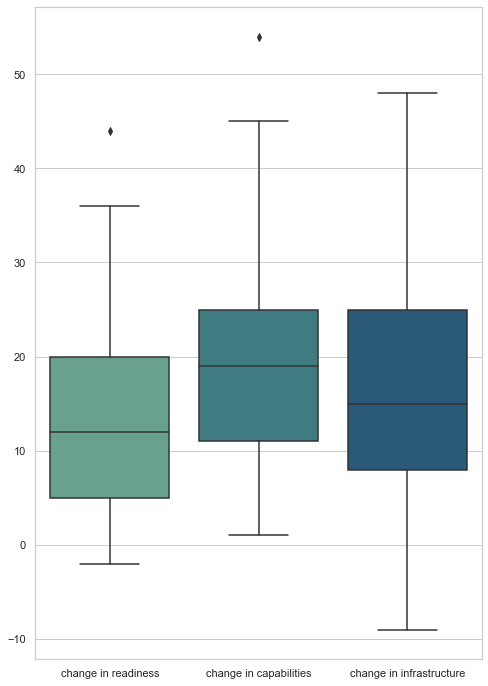

In [198]:
fig, ax1 = plt.subplots()

xlabels = ('change in readiness', 'change in capabilities', 'change in infrastructure')

sns.set(font_scale=1)
sns.color_palette("crest", as_cmap=True)

ax1 = sns.boxplot(data=heatmap_net_high[['readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']],
                 palette="crest")

ax1.set_xticklabels(xlabels)
ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(8,12)

sns.set_style("whitegrid")
plt.show()

#fig.savefig('output/figure_s4.png', bbox_inches="tight")

fig, ax1 = plt.subplots()

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)

ax1 = sns.boxplot(data=heatmap_net_high,
                 palette="crest")

ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

fig.set_size_inches(20,10)

plt.show()

#fig.savefig('output/figure_s4.png', bbox_inches="tight")

### joining both decrease/increase

In [181]:
data1 = heatmap_net_low[['readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']].assign(group="Trusts with decrease in total CDMI")
data2 = heatmap_net_high[['readiness_delta', 'capabilities_delta', 'enabling_infrastructure_delta']].assign(group="Trusts with increase in total CDMI")

In [182]:
cdf = pd.concat([data1, data2])
mdf = pd.melt(cdf, id_vars=['group'], var_name=['themes'])
mdf.head()

,group,themes,value
0,Trusts with decrease in total CDMI,readiness_delta,-6
1,Trusts with decrease in total CDMI,readiness_delta,-5
2,Trusts with decrease in total CDMI,readiness_delta,-16
3,Trusts with decrease in total CDMI,readiness_delta,-15
4,Trusts with decrease in total CDMI,readiness_delta,1


In [183]:
mdf['themes'] = mdf['themes'].str.replace('readiness_delta', 'change in readiness')
mdf['themes'] = mdf['themes'].str.replace('capabilities_delta', 'change in capabilties')
mdf['themes'] = mdf['themes'].str.replace('enabling_infrastructure_delta', 'change in infrastructure')

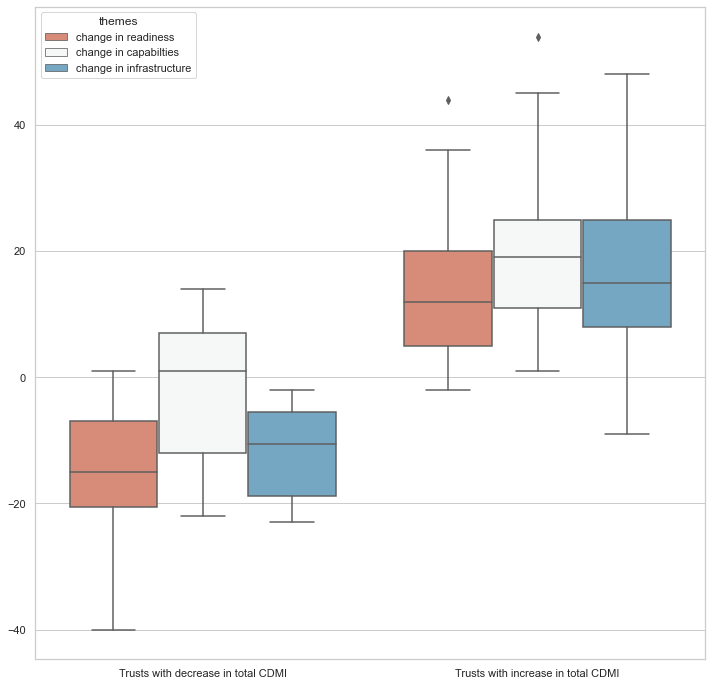

In [189]:
fig, ax1 = plt.subplots()

sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.color_palette("RdBu", as_cmap=True)


ax1 = sns.boxplot(x="group", y="value", hue="themes", data=mdf, palette="RdBu")

#ax1.set_xticklabels(xlabels)
ax1.set_ylabel('')
ax1.set_xlabel('')

fig.set_size_inches(12,12)


plt.show()

fig.savefig('output/figure_3.png', bbox_inches="tight")

In [187]:
heatmap_net_low.var()

icc_scaled                                   13.759207
total_delta                                 585.344444
readiness_delta                             164.844444
capabilities_delta                          146.666667
enabling_infrastructure_delta                64.322222
strategic_alignment_delta                   365.433333
leadership_delta                            261.511111
resourcing_delta                            373.333333
governance_delta                            292.666667
information_governance_delta                220.544444
asset_resource_optimisation_delta           328.000000
decision_support_delta                      380.766667
medicines_management_optimisation_delta     213.777778
orders_results_management_delta             113.433333
records_assessments_plans_delta             117.377778
remote_assistive_care_delta                 312.900000
transfers_of_care_delta                     620.400000
standards_delta                             348.277778
outcome_gd

In [265]:
heatmap_net_high.var()

icc_scaled                                  199.863216
total_delta                                 644.397583
readiness_delta                              91.570379
capabilities_delta                          113.090157
enabling_infrastructure_delta               136.422103
strategic_alignment_delta                   200.345362
leadership_delta                            217.045570
resourcing_delta                            223.494043
governance_delta                            126.565348
information_governance_delta                151.520472
asset_resource_optimisation_delta           304.963856
decision_support_delta                      308.176035
medicines_management_optimisation_delta     399.030477
orders_results_management_delta             199.044356
records_assessments_plans_delta             166.179736
remote_assistive_care_delta                 259.356003
transfers_of_care_delta                     321.929389
standards_delta                             305.053435
outcome_gd